Assignment 2
Daniel Scanks
V00788200

Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.
1) To start, make a N(0,1) random variable x, with 200,000 entries. Then make a linearly dependent variable yi=axi+ni, where a is some amplitude, and ni is a random noise varaible. Assume that ni is distributed as N(0,n), where n is the noise level.
Calculate the correlation co-efficient rxy between x and y for 40 different values of n, logarithmically spaced between 0.01 and 100. (hint use np.logspace).
Plot rxy versus the inverse of the noise n normalized by the standard devaition of the signal axi: asxn You may want to use ax.loglog to visualize the orders of magnitude.
Comment on the resulting comparison.



In [76]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

r = np.zeros(40)
n=0
N=200000
noisevalues = np.random.randn(40)

for ind,n in enumerate(noisevalues): 
    x= np.random.randn(N);x=x-np.mean(x)                                  #random variable for x: N(0,1)   
    n= np.random.randn(N)*0.5;y=y-np.mean(y)                              #random noise variable with max =0.5
    y= 2*x + n                                             #linearly dependent function a=2 random noise variable max =2
    r[ind]= np.sum(x*y)/np.std(x,ddof=1)/np.std(y,ddof=1)/(N-1)           # calculate r
rxy = r
print(rxy)
 

[ 0.97009613  0.97004173  0.97028483  0.97019362  0.97005901  0.97026761
  0.97000343  0.97036162  0.97017558  0.97005549  0.97000568  0.97015443
  0.96986882  0.9700313   0.97030398  0.97025165  0.97011496  0.97011515
  0.97024853  0.96998396  0.97030986  0.9701365   0.97029522  0.97021887
  0.97024161  0.9700384   0.9699838   0.97023831  0.97022722  0.97031109
  0.97016059  0.97002474  0.97009556  0.97009116  0.97011577  0.97017851
  0.96992413  0.9702597   0.96988539  0.97035455]


2) Repeat the above, but with a different value of a. Comment on how (and why) a changes the value of rxy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




Q2: Monte Carlo on slopes and test versus student-t distribution
1) We stated without proof that the slope b of a linear fit of y to x is distributed as a student-t distribution with N−2 degrees of freedom, with a standard devaition given by the standard deviation of y around the fit model y~. Lets test that emperically using a Monte Carlo technique.
First create an independet variable x from 10 points from an N(0,1) distribution.
Next, using n=1.0, and a=1.0 create the dependent variables yi=axi+ni where ni are drawn from the N(0,n) distribution. Calculate the slope b.
Do this 10000 times, and make a histogram of the resulting fits b. Also histogram sy|x as defined in the notes.
Comment on the histigrams

[ 0.30447916  0.38766814  0.23854213 ...,  0.28445973  0.37701153
  0.36705492]


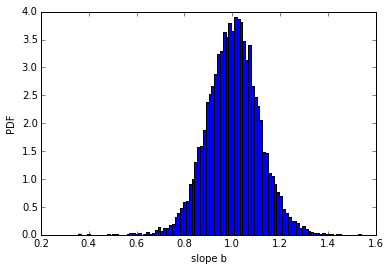

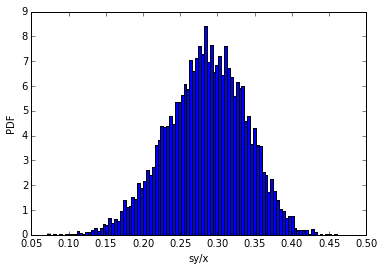

In [85]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N=10
times=10000
b= np.zeros(times)
a= np.zeros(times)
yhat= np.zeros(times)
syx=np.zeros(times)

for i in range(times):
    x= np.random.randn(N);x=x-np.mean(x)
    y= x + np.random.rand(N);y=y-np.mean(y)
    b[i] = np.sum(x*y)-N*np.mean(x)*np.mean(y)
    b[i] = b[i]/(np.sum(x**2)-N*np.mean(x)**2)            #
    a[i] = np.mean(y)-b[i]*np.mean(x)
    yhat=b[i]*x+a[i]
    syx[i]=np.sqrt(np.sum((y-yhat)**2)/(N-2))
slope = b
stddev = syx
print stddev




fig,ax=plt.subplots(1,1)
ax.hist(slope,100,normed=True);                        #b histogram
ax.set_xlabel('slope b')
ax.set_ylabel('PDF')

fig,ax=plt.subplots(1,1)
ax.hist(stddev,100,normed=True);                        #syx histogram
ax.set_xlabel('sy/x')
ax.set_ylabel('PDF')
